In [103]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

%matplotlib inline
from numpy.random import normal

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

## SVM - метод опорных векторов

Давайте вспомним, что в машинном обучении есть такая задача, как классификация

Для наглядности разберем следующий пример - пусть у нас есть объекты, у которых два признака - X1 и X2. При этом все объекты делятся на два класса - "синие" и "красные"

Такие объекты очень наглядно можно изобразить на плоскости

In [21]:
np.random.seed(0)

X1_red = normal(100, 10, 15)
X2_red = normal(50, 5, 15)

X1_blue = normal(140, 15, 15)
X2_blue = normal(30, 4, 15)

<function matplotlib.pyplot.plot>

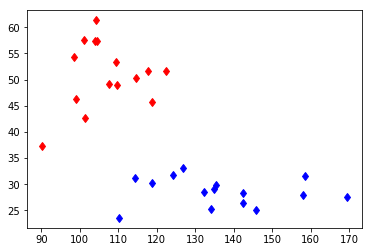

In [22]:
plt.plot(X1_red, X2_red, 'd', color='red')
plt.plot(X1_blue, X2_blue, 'd', color='blue')
plt.plot

Здорово, по картинке кажется, что объекты очень легко **разделяются** - интуитивно можно попробовать провести какую-то линию, для котороый мы сказали бы, что по одну сторону от неё лежат "красные", а по другую - "синие"

Сделать это можно, например, так:

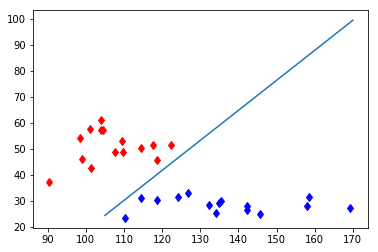

In [45]:
plt.plot(X1_red, X2_red, 'd', color='red')
plt.plot(X1_blue, X2_blue, 'd', color='blue')
plt.plot([105, 170], [24.5, 99.5])

А можно провести и так:

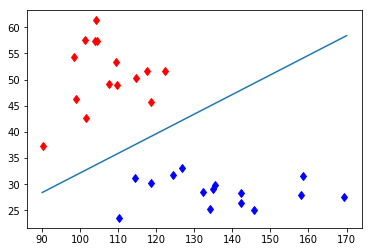

In [46]:
plt.plot(X1_red, X2_red, 'd', color='red')
plt.plot(X1_blue, X2_blue, 'd', color='blue')
plt.plot([90, 170], [28.4, 58.4])

Очевидно, что мы, если захотим использовать подобный метод, должны будем выбрать что-то одно. Как же это сделать?

И самым популярным вариантом при таком подходе является **SVM(support vector machine)** - метод опорных векторов.

Давайте поговорим о принципе, по которому происходит разделение в этом методе - SVM выбирает такую линию, для которой получаелся бы **самый широкий зазор до классов**. Продемонстрируем наглядно, что это значит - для первого варианта, который мы приводили выше, зазорная линия между классами будет выглядеть следующим образом

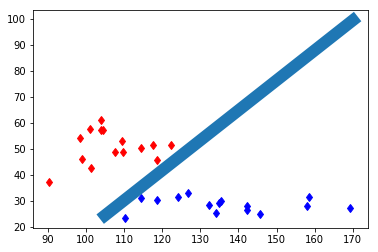

In [33]:
plt.plot(X1_red, X2_red, 'd', color='red')
plt.plot(X1_blue, X2_blue, 'd', color='blue')
plt.plot([105, 170], [24.5, 99.5],  linewidth=12.0)

А для второго варианта - так:

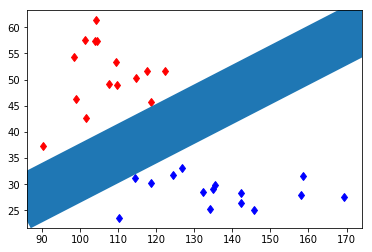

In [44]:
plt.plot(X1_red, X2_red, 'd', color='red')
plt.plot(X1_blue, X2_blue, 'd', color='blue')
plt.plot([90, 170], [28.4, 58.4], linewidth=53)

Хоть у нас и разные масштабы графиков, очевидно, что линия из второго случая толще, и метод опорных векторов предпочтет именно её. Но это просто два примера - в целом метод работает так, что для примеров из тренировочного множества выбирает **самую широкую линию**. При этом сама разделяющая линия будет линия, которая разделяется этот зазор **пополам** - то есть "серединная жилка" нашей толстой линии

Мньше слов, больше дела - чтобы лучше понять метод, попробуем использовать его

In [78]:
X2_red

array([ 51.66837164,  57.47039537,  48.97420868,  51.56533851,
        45.7295213 ,  37.23505092,  53.26809298,  54.32218099,
        46.2891749 ,  61.34877312,  42.72817163,  50.22879259,
        49.06408075,  57.66389607,  57.34679385])

In [133]:
X_train = pd.DataFrame(np.vstack((X1_red.reshape(-1, 1), X1_blue.reshape(-1, 1))), columns=['X1'])
X_train['X2'] = np.vstack((X2_red.reshape(-1, 1), X2_blue.reshape(-1, 1)))
Y = np.vstack((np.zeros(15).reshape(-1, 1), np.ones(15).reshape(-1, 1)))

In [134]:
### создаем SVM с линейным ядром

svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, Y)

C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [135]:
### отлично, мы обучили линейный SVM. Чтобы посмотреть, как будет выглядеть разделяющая линия, можно заглянуть в следующие параметры класса:

print ('Коэффициенты прямой перед X1 и X2: ', svc_classifier.coef_)
print ('Значение свободного коэффициента (b) : ', svc_classifier.intercept_)

Коэффициенты прямой перед X1 и X2:  [[ 0.04505153 -0.15099297]]
Значение свободного коэффициента (b) :  [ 0.55799522]


Уравнение прямой получаем такое: 0.04505153 \* X1 - 0.15099297 * X2 + 0.55799522 = 0

Нарисуем эту линию

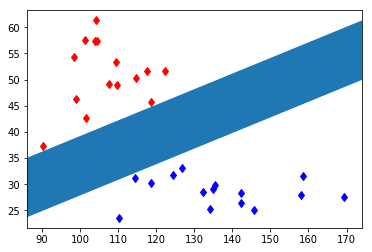

In [137]:
dot1_X1 = 90
dot1_X2 = (0.55799522 + 0.04505153 * dot1_X1) / 0.15099297
dot2_X1 = 170
dot2_X2 = (0.55799522 + 0.04505153 * dot2_X1) / 0.15099297

plt.plot(X1_red, X2_red, 'd', color='red')
plt.plot(X1_blue, X2_blue, 'd', color='blue')
plt.plot([dot1_X1, dot2_X1], [dot1_X2, dot2_X2], linewidth=55)

Как можно логично заметить, широкую линию, которая разделяет классы, выбирается исходя из крайних точек классов - в примере выше линия разделения будет упираться в некоторые точки одного класса и другого. Они собственно и называются **опорными**, и именно от них получил своё название этот метод

Поговорим совсем немножко о математике метода - как мы помним, практически в любом методе, у нас есть функция, для которой мы ищем минимум и исходя из неё получается итоговый алгоритм. Например, в случае с линейной регрессией мы искали минимум суммы кдадратов ошибок на точках из трэйна

И возникает вопрос, какая математика стоит "под капотом" этого метода - к сожалению, в этом случае функция будет намного сложнее, и подробно объяснять её не стоит, чтобы не сбить основное понимание метода - ***мы выбираем линию с самым широким зазором до ближайших точек классов***

Но нам надо подумать ещё о следующем - а что будет, если классы не будут разделяться так ровно, как на примере выше?

Например, взглянем на картинку ниже

In [94]:
np.random.seed(1)

Z1_red = normal(100, 12, 15)
Z2_red = normal(50, 5, 15)

Z1_blue = normal(130, 15, 15)
Z2_blue = normal(40, 5, 15)

<function matplotlib.pyplot.plot>

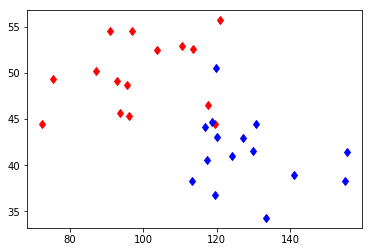

In [95]:
plt.plot(Z1_red, Z2_red, 'd', color='red')
plt.plot(Z1_blue, Z2_blue, 'd', color='blue')
plt.plot

Как бы мы не хотели красиво и ровно провести линию в этом случае, у нас не получится сделать так, чтобы по одну сторону лежали объекты только одного класса, а по другую - другого. Как же должен поступать метод в таком случае?

Математика метода станет следующая - если раньше нам нужно было просто сделать как можно шире зазор, то теперь, очевидно, мы должны учитывать еще то, сколько объектов лежат на неправильной стороне и штрафовать нашу функцию за это

Схематичный пример - мы провели линию, для которой получился зазор 10 условных единиц, но мы ошиблись аж на 3 объектах трэйна - они лежат с другой стороны. 

А для другой линии, зазор получился меньше - 5 условных единиц, но ошибается эта линия лишь на одном объекте. То есть ситуации, могут быть разные, и нам нужно учесть и ширину линии, и объекты, на которых мы ошибаемся

Таким образом, помимо ширины линии мы учитываем то, **сколько объектов мы классифицировали неправильно**

И последнее - мы рассмтривали самый простой вариант разделяющей линии - линейную.
Однако очевидно, что в некоторых ситуациях могут быть полезны и другие линии - полином какой-то степени, к примеру

Поэтому у методу 

За способ разделения объектов отвечает параметр **kernel** - он может быть linear, poly, rbf, sigmoid.

Linear строит линейное разделение, которое мы рассматривали выше. Остальыне - более сложные линии

Очевидно, что линейный вариант самый простой и подходит для хорошо раздлеляемых классов, а для более сложных случаев надо искать более сложные линии, поэтому главная рекоммендация в применении метода - это пробовать разные kernel-ы

Ниже представлен код, основная суть которого - демонстрация того, какие разные линии могут получаться при разных kernel-ах

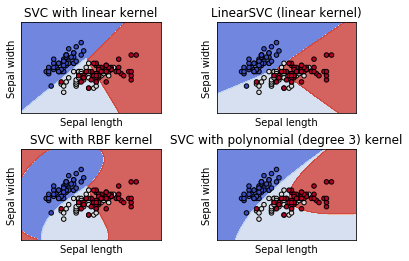

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# KNN - метод k ближайших соседей

Не будем далеко уходить от задач классификации - давайте опять рассмотрим графический пример с объектами на плоскости

<function matplotlib.pyplot.plot>

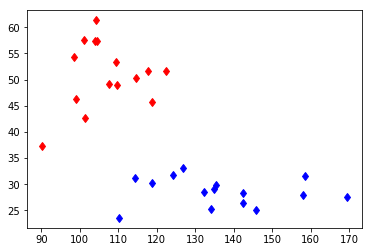

In [99]:
plt.plot(X1_red, X2_red, 'd', color='red')
plt.plot(X1_blue, X2_blue, 'd', color='blue')
plt.plot

В случае с SVM мы пытались разделить объекты какой-то линией, и классифицировать новые в зависимости от того, с какой стороны находится новый объект. Глядя на картинку, какие еще простые идеи классификации возникают?

Другой простой и интуитивно понятный вариант - это предположить, что новый объект относится к тому же классу, что и **ближайший** к нему

Предположим, что нам нужно отнести к одному из классов черную точку

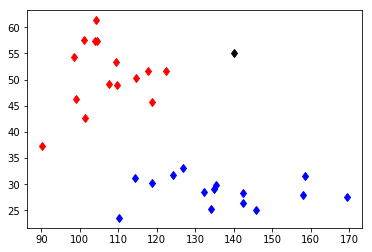

In [102]:
plt.plot(X1_red, X2_red, 'd', color='red')
plt.plot(X1_blue, X2_blue, 'd', color='blue')
plt.plot([140], [55], 'd', color='black')

Кажется, что самый близким соседом для неё является красная точка - поэтому мы отнесем её к классу "красных"

Это и есть **метод ближайшего соседа** - очень простой и понятный

Метод k ближайших соседей ничуть не сложнее - это просто обобщение метода ближайшего соседа. В этом случае мы выбираем k ближайших соседей и считаем, сколько из них относится к одному классу, сколько - к другим, и выбираем самый популярный вариант

К примеру, у нас классификация на 3 класса - красный, синий и зеленый

Мы выбрали 5 соседей, 3 из них оказались синими, 1 - красный, и 1 - зеленый

Значит, мы классифицируем наш объект как синий

Важный момент в этом методе - это способ замерять расстояние между точками - они бывают разные 
Давайте разберем два самых популярных варианта

Расстояние Евклида
<img src="evklid_metric.svg">

Манхэттенское расстояние
<img src="absolute.svg">

Практика - попробовать на каком-нибудь небольшом количестве точек опробовать вручную метод - считать расстояния от новой точки до всех имеющихся, находить k самых ближайших и классифицировать

Теперь перейдем к самому методу из библиотеки

In [138]:
### n_neighbors отвечает за то, сколько соседей мы будем смотреть
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, Y)

C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Метод обучился! Теперь пара примеров

Посмотрим на черную точку

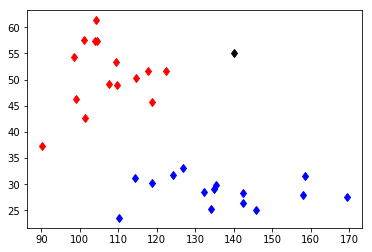

In [139]:
plt.plot(X1_red, X2_red, 'd', color='red')
plt.plot(X1_blue, X2_blue, 'd', color='blue')
plt.plot([140], [55], 'd', color='black')

Посмотрим, к какому цвету отнес её алгоритм - она стала красная

C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


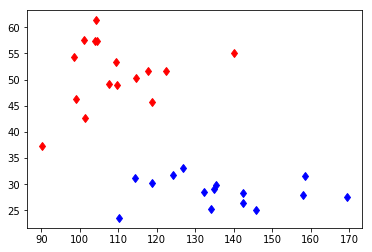

In [144]:
predict_result = knn.predict([140, 55])
if predict_result == 1:
    predict_color = 'blue'
else:
    predict_color = 'red'
    
plt.plot(X1_red, X2_red, 'd', color='red')
plt.plot(X1_blue, X2_blue, 'd', color='blue')
plt.plot([140], [55], 'd', color=predict_color)

И другая черная точка

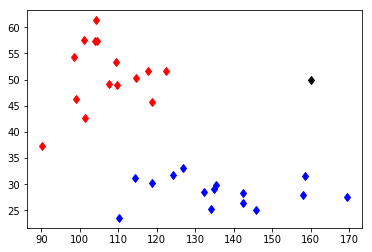

In [145]:
plt.plot(X1_red, X2_red, 'd', color='red')
plt.plot(X1_blue, X2_blue, 'd', color='blue')
plt.plot([160], [50], 'd', color='black')

In [146]:
predict_result = knn.predict([140, -20])
predict_result

C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1.])

C:\Users\isafiulin\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


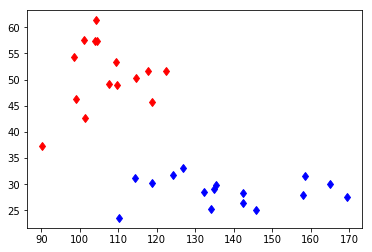

In [148]:
predict_result = knn.predict([165, 30])
if predict_result == 1:
    predict_color = 'blue'
else:
    predict_color = 'red'
    
plt.plot(X1_red, X2_red, 'd', color='red')
plt.plot(X1_blue, X2_blue, 'd', color='blue')
plt.plot([165], [30], 'd', color=predict_color)